<a href="https://colab.research.google.com/github/costadomar/An-lise_estat-stica/blob/main/correla%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CORRELAÇÃO DE VARIAVEIS

Para realizar este exercício deverá fazer o ‘download’ do ‘dataset’ no seguinte endereço:

https://archive.ics.uci.edu/ml/machine-learning-databases/00246/

A descrição do ‘dataset’ se encontra no seguinte endereço:

https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+%28North+Jutland%2C+Denmark%29

Este conjunto de dados foi construído adicionando informações de
elevação a uma rede de estradas 2D em North Jutland, Dinamarca. Os
valores de elevação foram extraídos de um Laser Scan Point Cloud massivo
publicamente disponível para a Dinamarca. Esta rede de estradas 3D acabou
sendo usada para comparar vários algoritmos de estimativa de combustível
e CO2. Este conjunto de dados pode ser usado por qualquer aplicativo que
requeira saber informações precisas de elevação de uma rede rodoviária para
realizar um roteamento mais preciso para rotas ecológicas, rotas de ciclistas,
etc.

Utilize o Python para estimar a maior correlação (positiva ou negativa)
entre duas variáveis numéricas.


SUMÁRIO DAS VARIÁVEIS
1. OSM_ID: OpenStreetMap ID for each road segment or edge in the graph.
2. LONGITUDE: Web Mercaptor (Google format) longitude
3. LATITUDE: Web Mercaptor (Google format) latitude
4. ALTITUDE: Height in meters.

#0. CARREGAMENTO DAS BIBLIOTECAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

#1. CARREGANDO A BASE DE DADOS

In [ ]:
df = pd.read_csv('/content/3D_spatial_network.txt' ,sep=",", header=None)

df.columns = ['OSM_ID','LONGITUDE','LATITUDE','ALTITUDE']

df.head()

,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740485,18.279465
4,144552912,9.351053,56.740486,18.422974


#2. ESTATÍSTICA DESCRITIVA DOS DADOS

In [ ]:
df.shape

(434874, 4)

In [ ]:
df.dtypes

OSM_ID         int64
LONGITUDE    float64
LATITUDE     float64
ALTITUDE     float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434874 entries, 0 to 434873
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   OSM_ID     434874 non-null  int64  
 1   LONGITUDE  434874 non-null  float64
 2   LATITUDE   434874 non-null  float64
 3   ALTITUDE   434874 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 13.3 MB


In [ ]:
df.describe()

,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
count,4.348740e+05,434874.000000,434874.000000,434874.000000
mean,9.786998e+07,9.731836,57.083758,22.185405
std,3.775233e+07,0.627349,0.289479,18.617989
min,4.482444e+06,8.146126,56.582486,-8.608184
25%,8.267897e+07,9.337649,56.846049,7.028053
50%,1.019797e+08,9.887195,57.042498,17.574678
75%,1.259547e+08,10.172359,57.308669,31.810224
max,1.577424e+08,11.199326,57.750511,134.441947


#3. VISUALIZAÇÃO DOS DADOS

##3.1 HISTOGRAMA

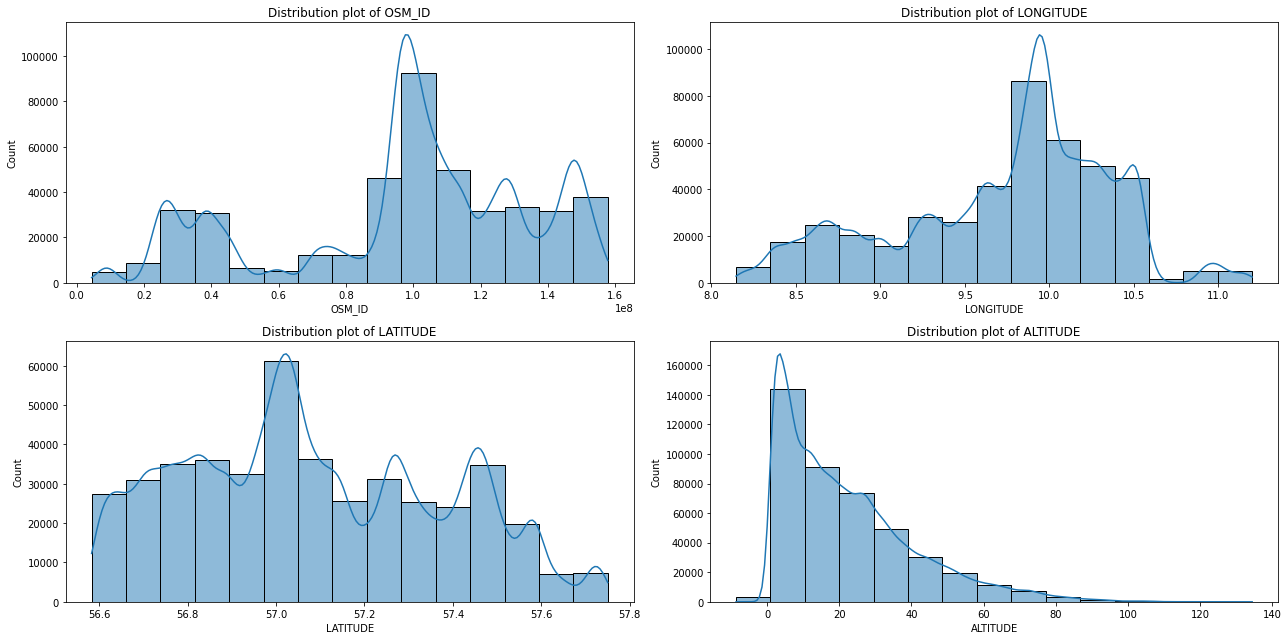

In [ ]:
plt.figure(figsize=(18,9))
for i in range(len(df.columns)):
  plt.subplot(2,2,i+1)
  sns.histplot(x=df.columns[i], bins=15,data=df, kde= True)
  plt.title('Distribution plot of {}'.format(df.columns[i]))
  plt.tight_layout()

##3.2 CORRELAÇÃO DAS VARIAVEIS

<Figure size 1440x1080 with 0 Axes>

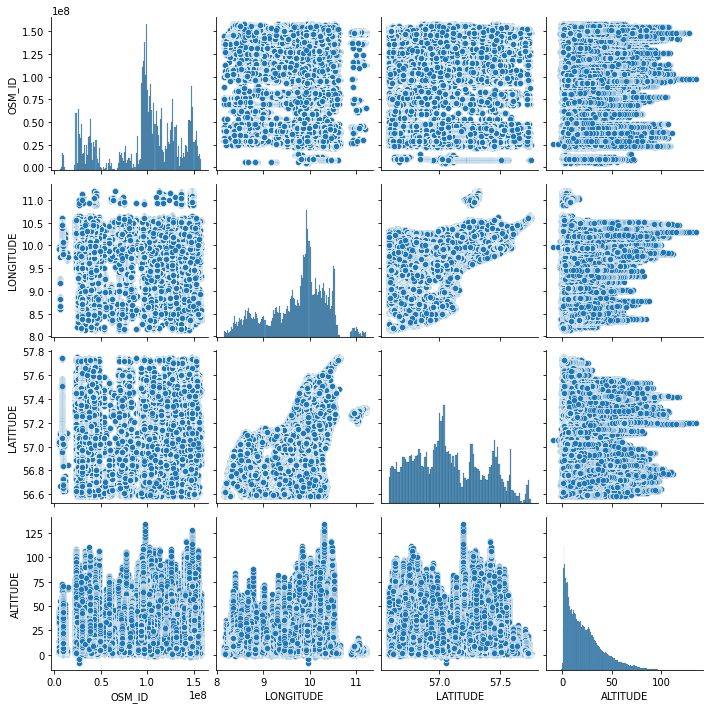

In [ ]:
#gRÁFICO DE CORRELAÇÃO DE TODAS AS VARIAVEIS
plt.figure(figsize=(20,15))
sns.pairplot(df)

In [ ]:
#PLOTANDO OS COEFICIENTES DE CORRELAÇAO
df.corr()

,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
OSM_ID,1.000000,-0.035716,-0.051424,0.106520
LONGITUDE,-0.035716,1.000000,0.566855,0.042323
LATITUDE,-0.051424,0.566855,1.000000,-0.105383
ALTITUDE,0.106520,0.042323,-0.105383,1.000000


Podemos perceber que a maior correlação entre duas variaveis acontece com latitude e longitude, apresentando um coeficiente de person de 0.57.

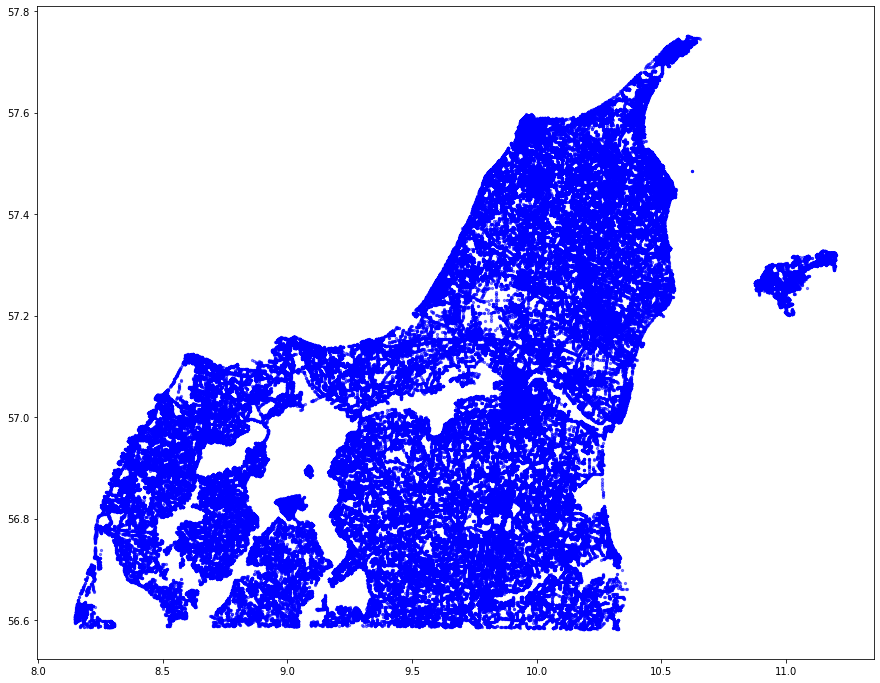

In [ ]:
#GRÁFICO DE CORRELAÇÃO ENTRE DUAS VARIAVEIS (longitude x latitude)
plt.figure(figsize=(15,12))
plt.scatter(df['LONGITUDE'].values,
            df['LATITUDE'].values,
            s= 5, c='blue',alpha = 0.5, zorder = 5)

In [ ]:
# crs = {'init':'EPSG:4326'}
# geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
# geo_df = gpd.GeoDataFrame(df, 
#                           crs = crs, 
#                           geometry = geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# geo_df.head()

,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE,geometry
0,144552912,9.349849,56.740876,17.052772,POINT (9.34985 56.74088)
1,144552912,9.350188,56.740679,17.614840,POINT (9.35019 56.74068)
2,144552912,9.350549,56.740544,18.083536,POINT (9.35055 56.74054)
3,144552912,9.350806,56.740485,18.279465,POINT (9.35081 56.74048)
4,144552912,9.351053,56.740486,18.422974,POINT (9.35105 56.74049)


2